In [1]:
import pandas as pd
from ecallisto_ng.plotting.plotting import plot_spectogram
from ecallisto_ng.data_download.downloader import get_ecallisto_data
from ecallisto_ng.data_processing.utils import subtract_constant_background
from datetime import timedelta

In [2]:
# pip install ecallisto_ng 
# Maybe you need to install numpy below version 2, so 
# pip install numpy==1.26.4 --fore-reinstall

In [3]:
TO_EVALUATE = "ecallisto_radio_sunburst-2014_test.csv"

In [37]:
df = pd.read_csv(TO_EVALUATE).drop(columns='Unnamed: 0').sort_values(by='pred', ascending=False)
df['datetime'] = pd.to_datetime(df['datetime'])

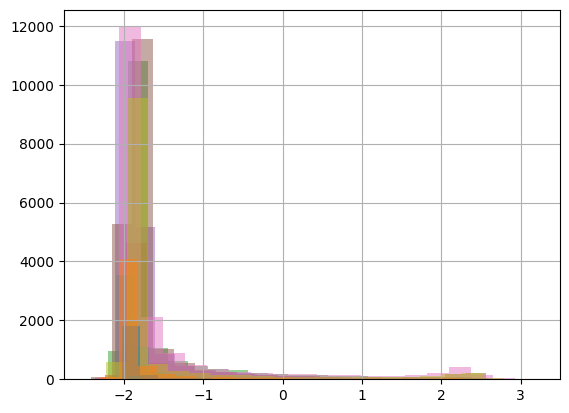

In [38]:
fig = df.groupby('antenna')['pred'].hist(bins=20, alpha=0.5)

In [39]:
# Some predictions are NAN, unknown why.
df.isna()['pred'].sum()

75

In [40]:
LENGTH = timedelta(minutes=15)

In [41]:
df_burst = df[df.pred>0].reset_index(drop=True)

In [42]:
df_burst

datetime     antenna      pred
0    2014-02-10 13:03:00  GLASGOW_59  3.207957
1    2014-10-21 12:07:00  GLASGOW_59  3.162639
2    2014-07-08 16:19:00  GLASGOW_59  3.133477
3    2014-10-30 14:55:00   HUMAIN_59  3.057339
4    2014-01-08 14:55:00  GLASGOW_59  3.052436
...                  ...         ...       ...
6223 2014-06-12 04:11:00  GLASGOW_59  0.000960
6224 2014-07-30 09:05:00  DARO-HF_58  0.000558
6225 2014-05-08 15:09:00  GLASGOW_59  0.000476
6226 2014-07-05 15:23:00      BIR_03  0.000384
6227 2014-02-08 10:01:00  GLASGOW_59  0.000084

[6228 rows x 3 columns]

In [47]:
TO_PLOT = 0
LENGTH = timedelta(minutes=15)

###
instrument = df_burst.loc[TO_PLOT, 'antenna']
start_datetime = df_burst.loc[TO_PLOT, 'datetime']

In [49]:
spec = get_ecallisto_data(start_datetime, start_datetime + LENGTH, instrument)[instrument]

In [50]:
plot_spectogram(subtract_constant_background(spec).clip(0, 16))